In [62]:
import pandas as pd

In [63]:
from sklearn.datasets import load_iris

In [64]:
data =load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df["Species"] =data.target


In [66]:
df["Species"] =df["Species"].map({0:'setosa',1:'versicolor',2:'virginica'})
df                            

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
print(f"Null values: \n{df.isna().sum()}")
print(f"\nDuplicated values:\n{df.duplicated().sum()}")

Null values: 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

Duplicated values:
1


In [68]:
df.drop_duplicates(inplace = True)
print(f"\nDuplicated vaues:\n{df.duplicated().sum()}")


Duplicated vaues:
0


In [69]:
#assign features in x and target in y  variables
x= df.drop(columns=['Species'])
y = df['Species']

In [70]:
#perform train test split
#import train test from sklearn in the first block of this notebook
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
print(f"Train size{x_train.shape}")
print(f"Test size{x_test.shape}")

Train size(104, 4)
Test size(45, 4)


In [71]:
#import decision tree in the first block of this notebook
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [72]:
#taining/fitting model with training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
dt.score(x_test,y_test)

1.0

In [75]:
y_predict =dt.predict(x_test)
print(y_predict.shape)

(45,)


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



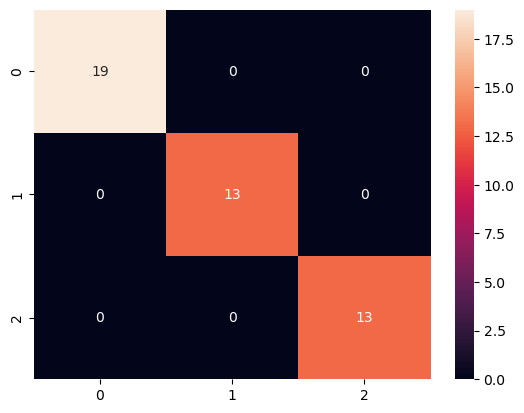

In [79]:
#import matplatib.pyplot and seaborn for visulazation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf, annot=True)
plt.show()

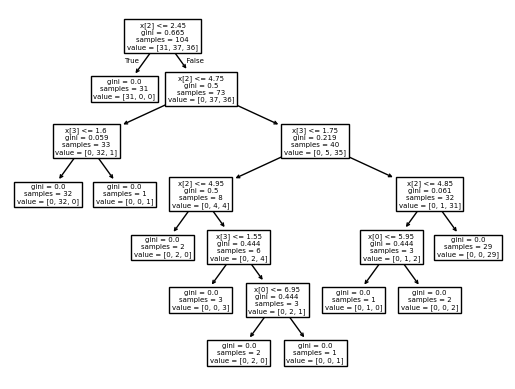

In [82]:
#plotting the decision tree
#depth of the tree can be controlled using max_depth attribute in DecisionTree
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()